In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data=pd.read_csv("C:\\k means\\Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [37]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [38]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [39]:
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [42]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()
scalar.fit(data[['Annual Income (k$)']])
data['Annual Income (k$)']=scalar.fit_transform(data[['Annual Income (k$)']])
scalar.fit(data[['Spending Score (1-100)']])
data['Spending Score (1-100)']=scalar.fit_transform(data[['Spending Score (1-100)']])
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,0.000000,0.387755
1,2,Male,21,0.000000,0.816327
2,3,Female,20,0.008197,0.051020
3,4,Female,23,0.008197,0.775510
4,5,Female,31,0.016393,0.397959


In [ ]:
m={'Male':0,'Female':1}
data['Gender']=data.Gender.map(m)
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,0.000000,0.387755
1,2,0,21,0.000000,0.816327
2,3,1,20,0.008197,0.051020
3,4,1,23,0.008197,0.775510
4,5,1,31,0.016393,0.397959


In [64]:
from sklearn.cluster import KMeans
sse=[]
for k in range(1,11):
    km=KMeans(n_clusters=k)
    km.fit(data[['Annual Income (k$)','Spending Score (1-100)']])
    sse.append(km.inertia_)

sse

[23.04072032603991,
 17.086783558011,
 10.730347267571425,
 6.120981569127615,
 5.624430591677195,
 3.2243666168898626,
 2.9416692289190207,
 2.340282751117987,
 1.90285154875221,
 1.7418334560554949]

<function matplotlib.pyplot.show(close=None, block=None)>

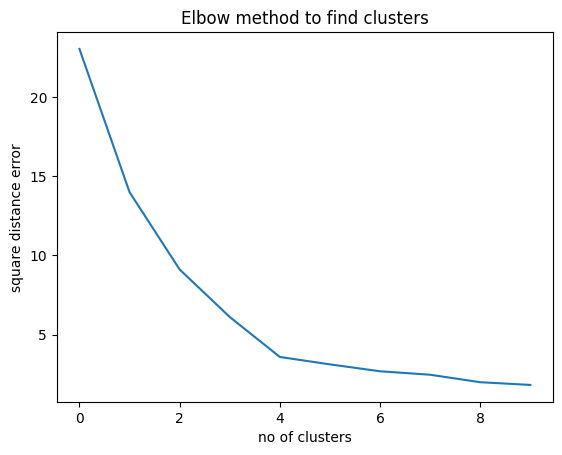

In [93]:
import matplotlib.pyplot as plt 

plt.xlabel('no of clusters')
plt.ylabel('square distance error')
plt.title("Elbow method to find clusters")
plt.plot(ssc)
plt.show

In [76]:
km=KMeans(n_clusters=4)
prediction=km.fit_predict(data[['Annual Income (k$)','Spending Score (1-100)']])

data['no_clusters']=prediction

data.head()





,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),no_clusters
0,1,0,19,0.000000,0.387755,3
1,2,0,21,0.000000,0.816327,0
2,3,1,20,0.008197,0.051020,3
3,4,1,23,0.008197,0.775510,0
4,5,1,31,0.016393,0.397959,3


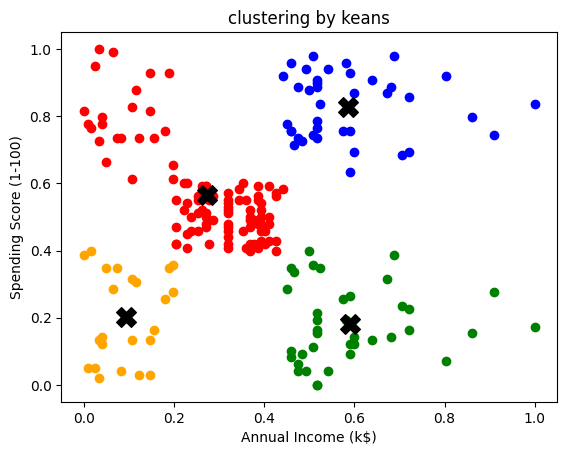

In [90]:
data1=data[data.no_clusters==0]
data2=data[data.no_clusters==1]
data3=data[data.no_clusters==2]
data4=data[data.no_clusters==3]


plt.scatter(data1['Annual Income (k$)'],data1['Spending Score (1-100)'],color='red')
plt.scatter(data2['Annual Income (k$)'],data2['Spending Score (1-100)'],color='green')
plt.scatter(data3['Annual Income (k$)'],data3['Spending Score (1-100)'],color='blue')
plt.scatter(data4['Annual Income (k$)'],data4['Spending Score (1-100)'],color='orange')
plt.scatter(centers[:,0], centers[:,1], c='black', s=200, marker='X', label='Centroids')

plt.title("clustering by keans")
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


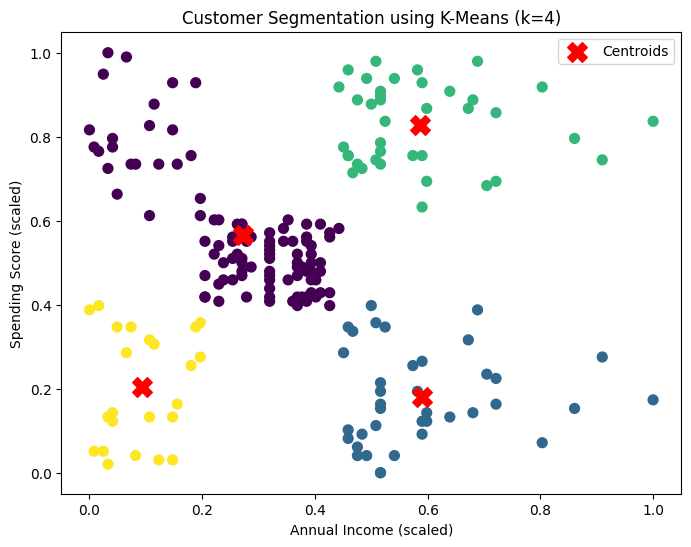

In [94]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(
    data['Annual Income (k$)'], 
    data['Spending Score (1-100)'],
    c=data['no_clusters'], cmap='viridis', s=50
)


centers = km.cluster_centers_
plt.scatter(
    centers[:,0], centers[:,1],
    c='red', s=200, marker='X', label='Centroids'
)


plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.title("Customer Segmentation using K-Means (k=4)")
plt.legend()
plt.show()

